<a href="https://www.kaggle.com/code/ndohmoise/build-an-app-for-public-health-2-explore-the-data?scriptVersionId=150828585" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#importation des librairies 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
#écrivons la fonction nécessaire à l'analyse des données 
def pourcentage(data): 
    n = data.shape[0]
    ret = pd.DataFrame(data.isnull().sum(), columns=['nb_manquants'])
    ret['pourcentage'] = (ret['nb_manquants']/n)*100
    ret['types'] = data.dtypes
    return ret

**Nous allons réalisé une analyse univariée et bi-variée des données extrait de l'appel à projets et proposer notre idée d'application**

Analyse Univariée

In [3]:
data_exploration = pd.read_csv('/kaggle/input/data-food-cleaned-2023/data_food_cleaned.csv', sep='\t')
data_exploration.head()

/tmp/ipykernel_21/2346483959.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data_exploration = pd.read_csv('/kaggle/input/data-food-cleaned-2023/data_food_cleaned.csv', sep='\t')


,code,product_name,countries_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutriscore_grade,nutrition-score-fr_100g,pnns_groups_1,pnns_groups_2
0,3760029248001,Caramels tendres au beurre salé au sel de Guér...,France,1717.0,10.9,7.0,73.50000,49.300000,3.0,3.000000,1.700000,0.680000,e,28.0,sugary snacks,sweets
1,3029330062806,Jacquet Les bouchées créatives à garnir,France,1898.0,15.5,1.3,68.00000,2.000000,3.0,8.500000,1.752600,0.701040,c,10.0,salty snacks,appetizers
2,3257980112590,Boudoirs,France,1615.0,3.2,1.2,80.40000,51.800000,1.6,6.900000,0.090000,0.036000,d,14.0,sugary snacks,biscuits and cakes
3,3160181210524,Cookies tout chocolat Biocoop,France,2040.0,25.0,14.0,56.00000,33.000000,5.5,7.000000,0.381000,0.152400,e,19.0,sugary snacks,biscuits and cakes
4,8002270014901,Eau minérale naturelle avec adjonction de gaz ...,"Belgique,France,Italie,Luxembourg,Suisse",179.0,0.0,0.0,27.23533,13.938277,3.3,8.739423,1.279682,0.512449,a,0.0,beverages,waters and flavored waters


In [4]:
pourcentage(data_exploration)

,nb_manquants,pourcentage,types
code,0,0.0,object
product_name,0,0.0,object
countries_fr,0,0.0,object
energy_100g,0,0.0,float64
fat_100g,0,0.0,float64
saturated-fat_100g,0,0.0,float64
carbohydrates_100g,0,0.0,float64
sugars_100g,0,0.0,float64
fiber_100g,0,0.0,float64
proteins_100g,0,0.0,float64


nous remarquons que la base de données est propre et sans valeur manquante

In [5]:
#analysons les features numériques 
data_exploration_num = data_exploration.select_dtypes(include = ['float64', 'int64'])
data_exploration_num.columns

Index(['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g', 'nutrition-score-fr_100g'],
      dtype='object')

In [6]:
#analysons les features numériques 
data_exploration[data_exploration_num.columns].describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,641042.000000,641042.000000,641042.000000,641042.000000,641042.000000,641042.000000,641042.000000,641042.000000,641042.000000,641042.000000
mean,1142.874362,12.979886,4.839392,27.362176,13.968521,3.351229,8.708830,1.279682,0.512449,10.450070
std,719.620145,15.947784,7.337006,25.145915,18.253929,5.370146,8.883943,4.305194,1.730021,5.457191
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,565.000000,1.600000,0.400000,4.500000,1.000000,0.500000,2.550000,0.100000,0.040000,11.000000
50%,1130.000000,7.300000,1.900000,27.235330,8.000000,1.900000,8.000000,0.900000,0.360000,11.000000
75%,1590.000000,19.300000,6.300000,46.000000,13.938277,4.000000,10.000000,1.279682,0.512449,11.000000
max,3768.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,78.740000,40.000000


In [7]:
data_exploration.head()

,code,product_name,countries_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutriscore_grade,nutrition-score-fr_100g,pnns_groups_1,pnns_groups_2
0,3760029248001,Caramels tendres au beurre salé au sel de Guér...,France,1717.0,10.9,7.0,73.50000,49.300000,3.0,3.000000,1.700000,0.680000,e,28.0,sugary snacks,sweets
1,3029330062806,Jacquet Les bouchées créatives à garnir,France,1898.0,15.5,1.3,68.00000,2.000000,3.0,8.500000,1.752600,0.701040,c,10.0,salty snacks,appetizers
2,3257980112590,Boudoirs,France,1615.0,3.2,1.2,80.40000,51.800000,1.6,6.900000,0.090000,0.036000,d,14.0,sugary snacks,biscuits and cakes
3,3160181210524,Cookies tout chocolat Biocoop,France,2040.0,25.0,14.0,56.00000,33.000000,5.5,7.000000,0.381000,0.152400,e,19.0,sugary snacks,biscuits and cakes
4,8002270014901,Eau minérale naturelle avec adjonction de gaz ...,"Belgique,France,Italie,Luxembourg,Suisse",179.0,0.0,0.0,27.23533,13.938277,3.3,8.739423,1.279682,0.512449,a,0.0,beverages,waters and flavored waters


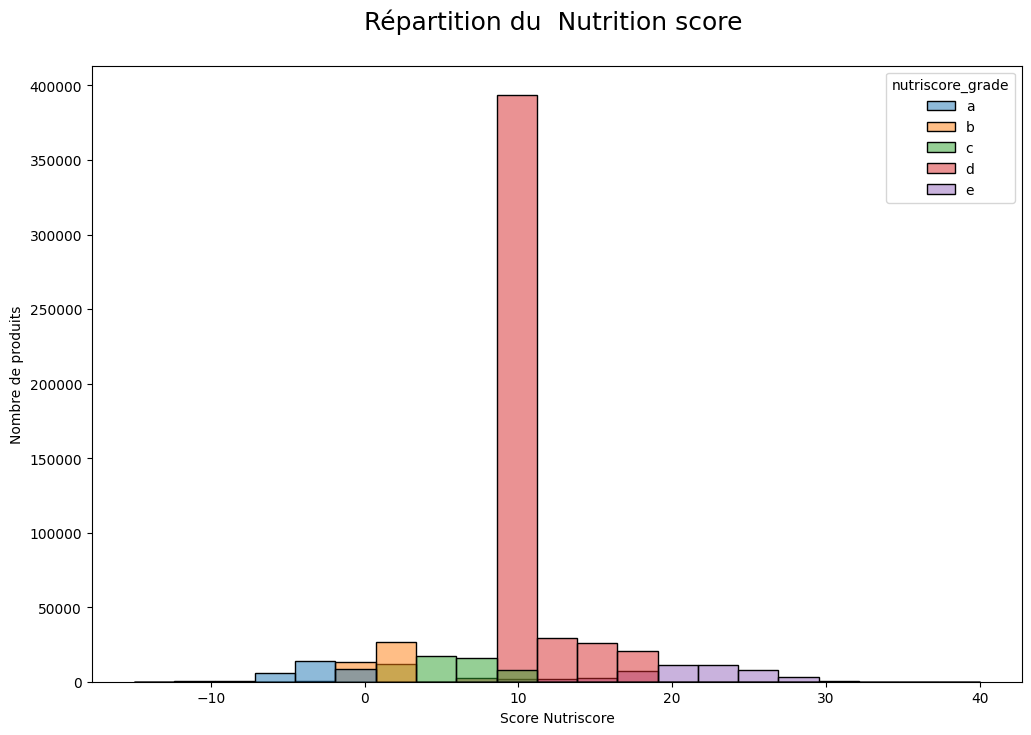

In [8]:
#visualisons la distribution du nutriscore et nutrition grade 
plt.figure(figsize = (12,8))
title=plt.title("Répartition du  Nutrition score " "\n", fontsize=18)
ax=sns.histplot(data=data_exploration.sort_values("nutriscore_grade"), x="nutrition-score-fr_100g", hue="nutriscore_grade")
ax_set=ax.set_xlabel("Score Nutriscore")
ax_set=ax.set_ylabel("Nombre de produits")

La répartition des Nutriscores est plus ou moins équitable avec tout de même une prépondérance pour la classe C, avec un pic des valeurs autours de 9.

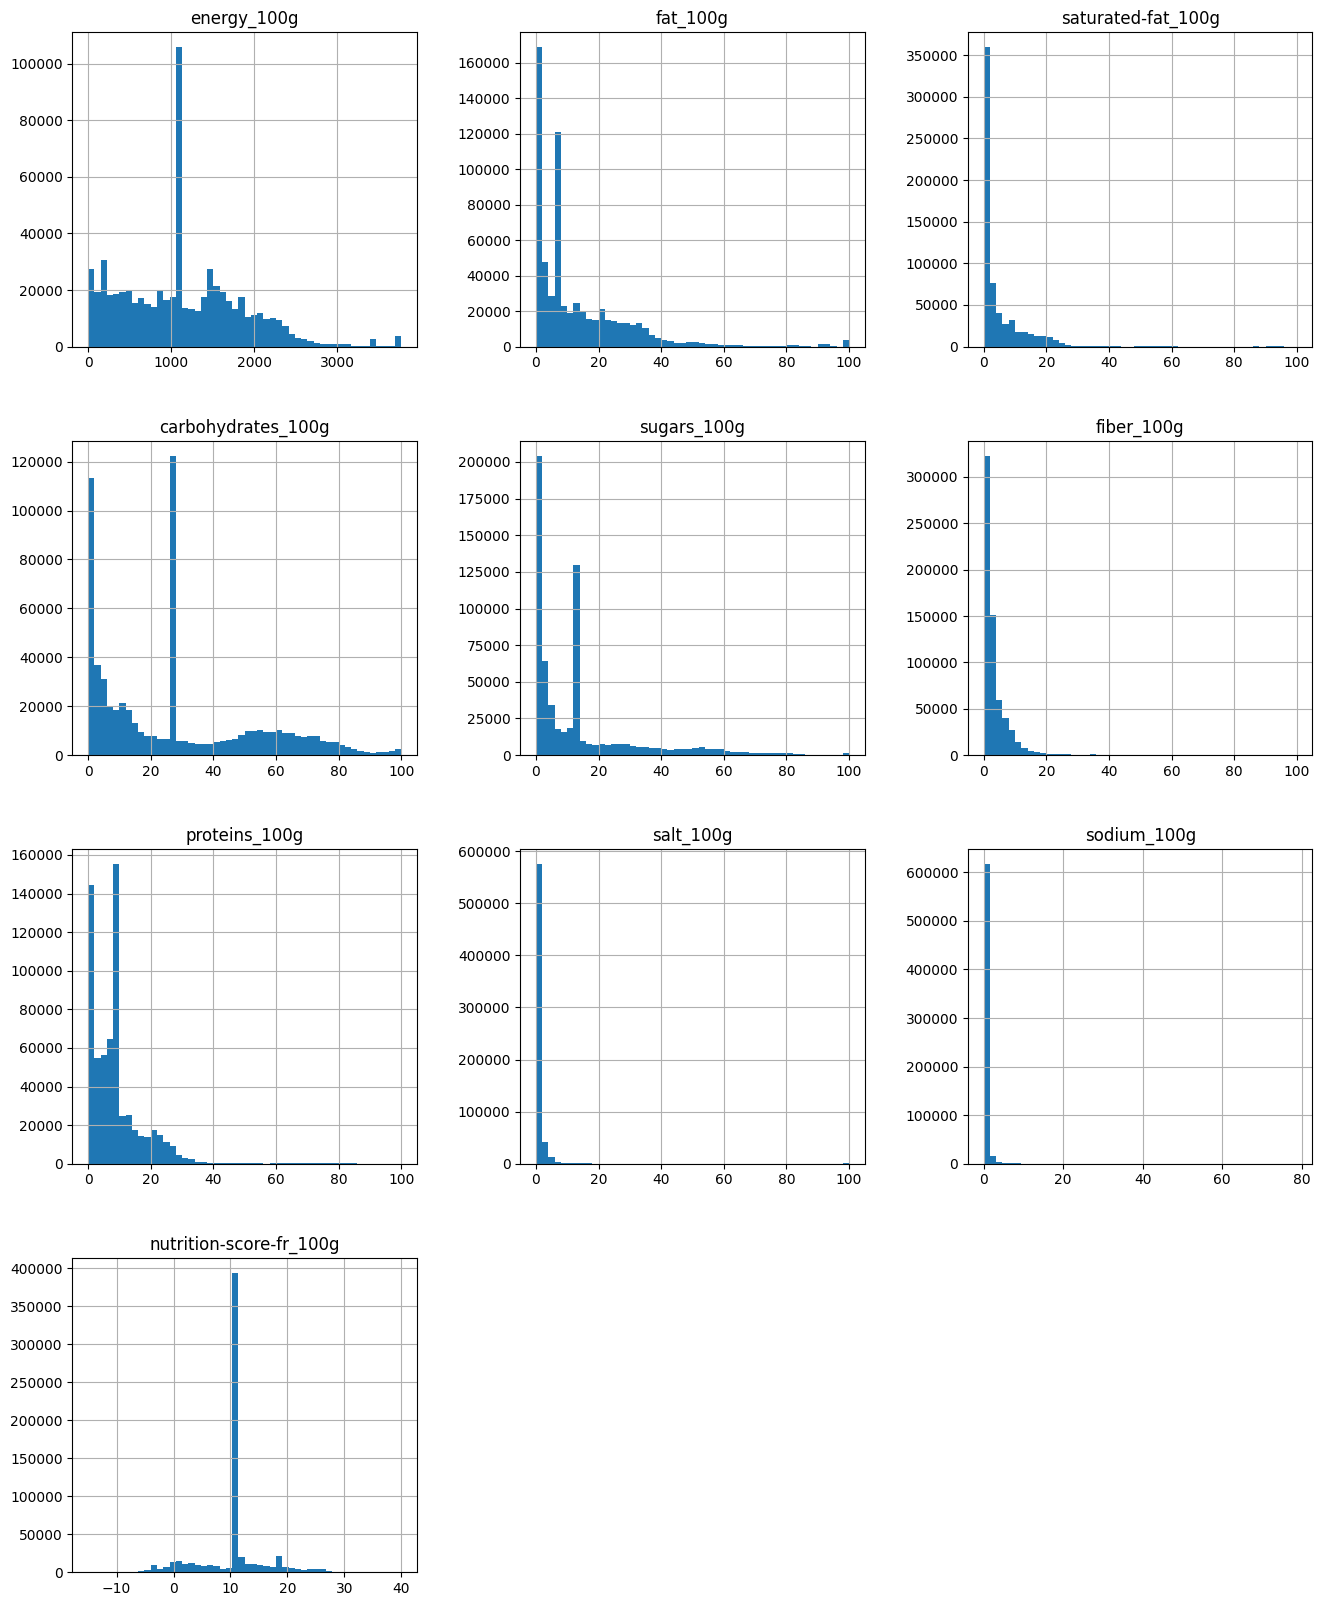

In [9]:
fig=data_exploration_num.hist(figsize=(16, 20), bins=50)

In [10]:
#visualisons les features catégorielles 
data_food_string = data_exploration.select_dtypes(include=['O'])
data_food_string.columns

Index(['code', 'product_name', 'countries_fr', 'nutriscore_grade',
       'pnns_groups_1', 'pnns_groups_2'],
      dtype='object')

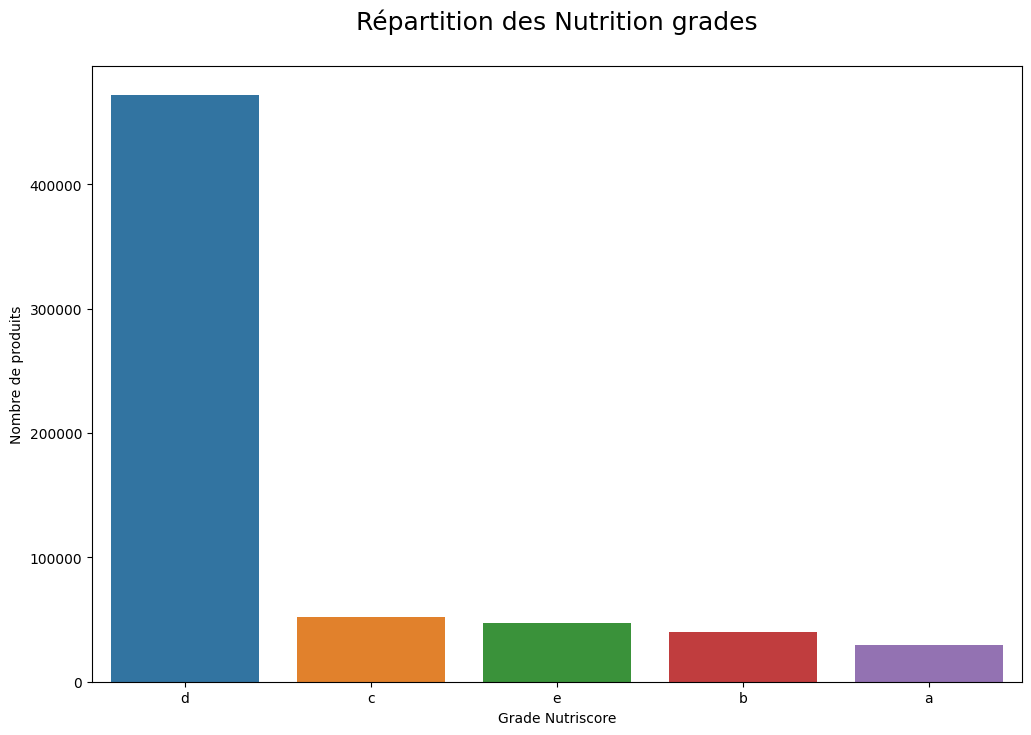

In [11]:
#visualisons les données catégorielles 
comptage_type_grade = data_exploration['nutriscore_grade'].value_counts()
plt.figure(figsize=(12, 8))
ax=sns.barplot(x=comptage_type_grade.index, y=comptage_type_grade.values)
ax.set_xlabel("Grade Nutriscore")
ax.set_ylabel("Nombre de produits")
title=plt.title("Répartition des Nutrition grades" "\n", fontsize=18)

In [12]:
#comptons le nombre de produit dans pnns_groups_1
comptage_type_categories = data_exploration['pnns_groups_1'].value_counts()

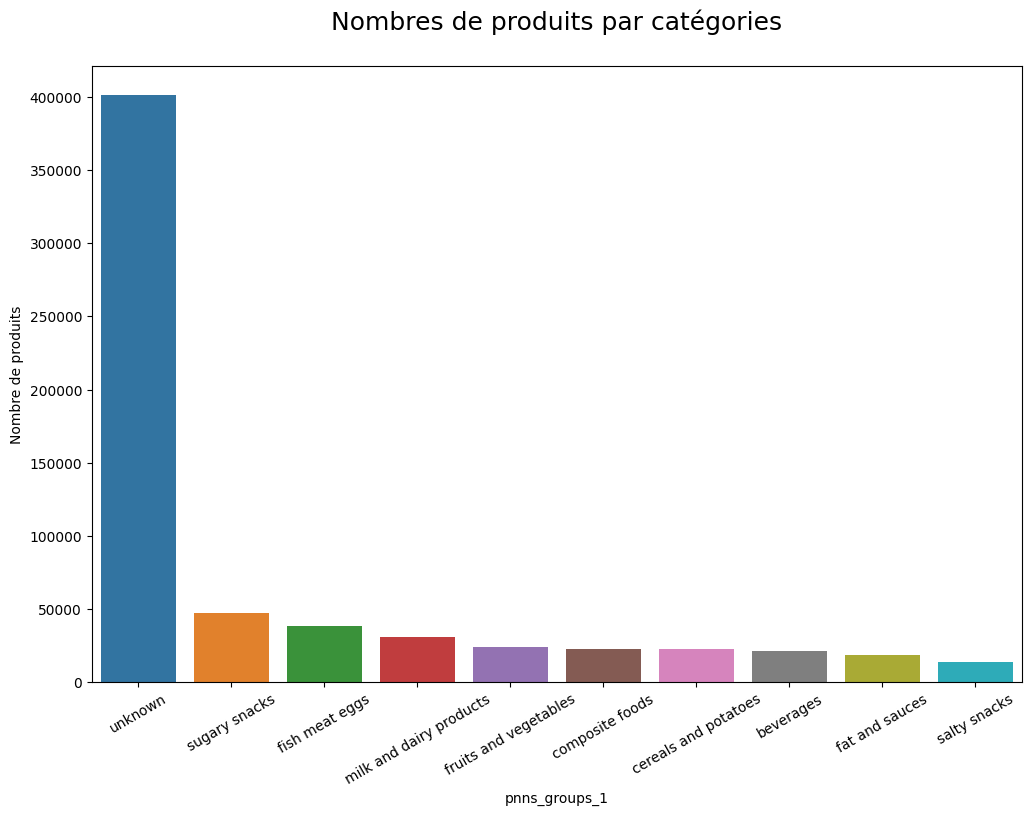

In [13]:
plt.figure(figsize = (12, 8))
ax = sns.barplot(x=comptage_type_categories.index, y=comptage_type_categories.values)
ax_set = ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
ax.set_ylabel("Nombre de produits")
title = plt.title("Nombres de produits par catégories" "\n", fontsize = 18)

In [14]:
#comptons les produits dans pnns_groups_2
comptage_type_categories_2 = data_exploration['pnns_groups_2'].value_counts()

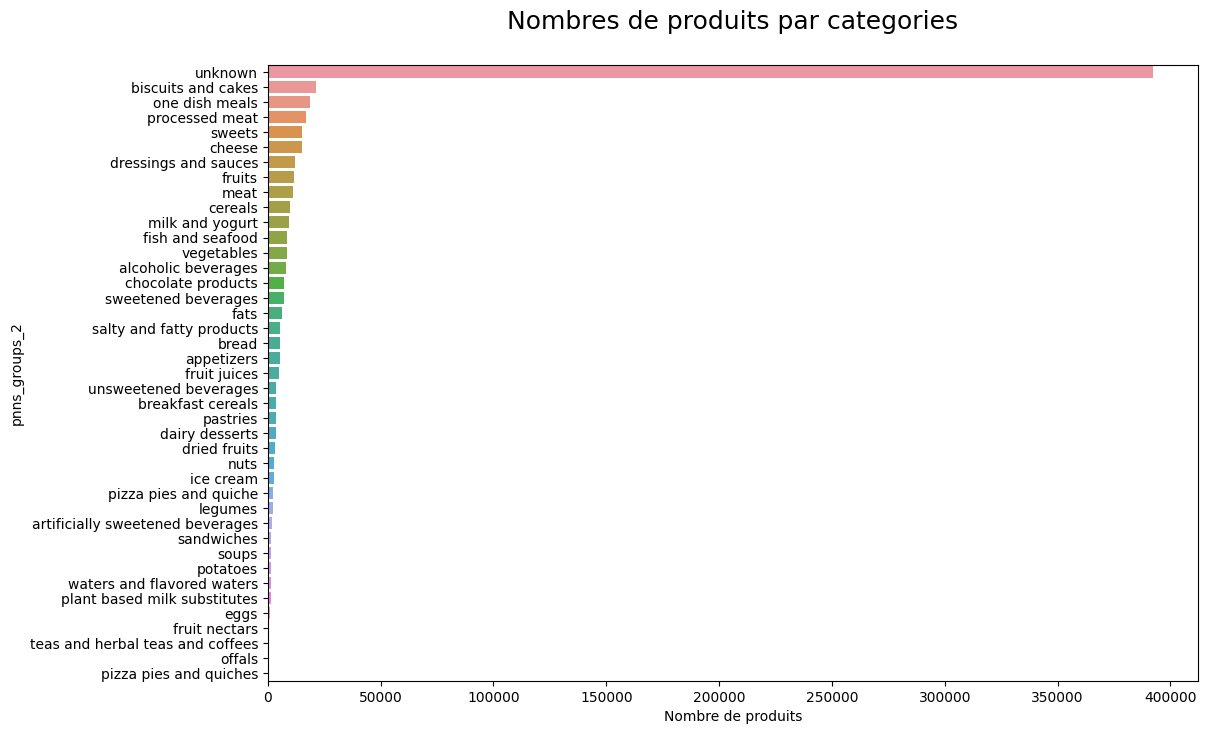

In [15]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x = comptage_type_categories_2.values, y = comptage_type_categories_2.index)
ax.set_xlabel("Nombre de produits")
title = plt.title("Nombres de produits par categories" "\n", fontsize = 18)

Nous remarquons que la variables unknown est de loin la plus représenté

In [16]:
data_exploration

,code,product_name,countries_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutriscore_grade,nutrition-score-fr_100g,pnns_groups_1,pnns_groups_2
0,3760029248001,Caramels tendres au beurre salé au sel de Guér...,France,1717.0,10.9,7.0,73.50000,49.300000,3.0,3.000000,1.700000,0.680000,e,28.0,sugary snacks,sweets
1,3029330062806,Jacquet Les bouchées créatives à garnir,France,1898.0,15.5,1.3,68.00000,2.000000,3.0,8.500000,1.752600,0.701040,c,10.0,salty snacks,appetizers
2,3257980112590,Boudoirs,France,1615.0,3.2,1.2,80.40000,51.800000,1.6,6.900000,0.090000,0.036000,d,14.0,sugary snacks,biscuits and cakes
3,3160181210524,Cookies tout chocolat Biocoop,France,2040.0,25.0,14.0,56.00000,33.000000,5.5,7.000000,0.381000,0.152400,e,19.0,sugary snacks,biscuits and cakes
4,8002270014901,Eau minérale naturelle avec adjonction de gaz ...,"Belgique,France,Italie,Luxembourg,Suisse",179.0,0.0,0.0,27.23533,13.938277,3.3,8.739423,1.279682,0.512449,a,0.0,beverages,waters and flavored waters
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641037,3760025190069,Gwada original,France,88.0,0.0,0.0,5.00000,1.300000,1.2,0.000000,0.000000,0.000000,d,11.0,unknown,unknown
641038,3700048100027,Boulettes au boeuf,France,862.0,15.0,5.7,0.70000,0.300000,1.2,17.000000,0.120000,0.048000,d,11.0,unknown,unknown
641039,66200021030,Assaisonnement La Grille (poulet De Barbecue),France,1130.0,7.3,1.9,27.23533,13.938277,1.2,8.739423,1.279682,0.512449,d,11.0,unknown,unknown
641040,60383993542,Honey mustard,France,837.0,0.0,0.0,40.00000,40.000000,1.2,4.000000,1.250000,0.500000,d,11.0,unknown,unknown


**ANALYSE BI-VARIEE**

In [17]:
#analyse bi-variée
corr = data_exploration_num.corr()
corr

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
energy_100g,1.000000,0.748888,0.564397,0.420036,0.291984,0.047768,0.189787,-0.047271,-0.047206,0.389562
fat_100g,0.748888,1.000000,0.720004,-0.118451,-0.062412,0.012684,0.133651,-0.003787,-0.003753,0.339434
saturated-fat_100g,0.564397,0.720004,1.000000,-0.053581,0.035931,0.001845,0.137757,-0.006697,-0.006807,0.393551
carbohydrates_100g,0.420036,-0.118451,-0.053581,1.000000,0.703695,0.040518,-0.212939,-0.086457,-0.086077,0.146510
sugars_100g,0.291984,-0.062412,0.035931,0.703695,1.000000,0.007340,-0.273465,-0.093387,-0.092957,0.233212
fiber_100g,0.047768,0.012684,0.001845,0.040518,0.007340,1.000000,0.040138,0.000274,0.000744,-0.016840
proteins_100g,0.189787,0.133651,0.137757,-0.212939,-0.273465,0.040138,1.000000,0.059074,0.058929,0.042125
salt_100g,-0.047271,-0.003787,-0.006697,-0.086457,-0.093387,0.000274,0.059074,1.000000,0.995455,0.057030
sodium_100g,-0.047206,-0.003753,-0.006807,-0.086077,-0.092957,0.000744,0.058929,0.995455,1.000000,0.056927
nutrition-score-fr_100g,0.389562,0.339434,0.393551,0.146510,0.233212,-0.016840,0.042125,0.057030,0.056927,1.000000


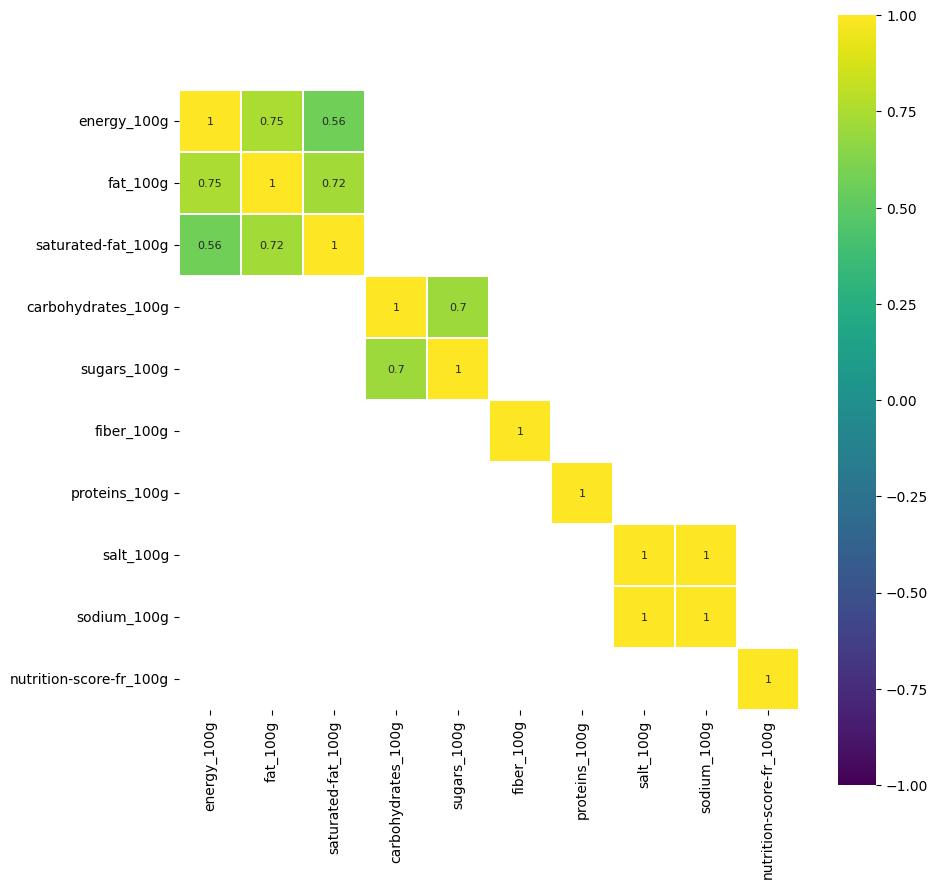

In [18]:
#représentons la corrélation entre les variables 
plt.figure(figsize=(10, 10))
sns.heatmap(corr[(corr > 0.5) | (corr <= -0.3)], 
           cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [19]:
data_exploration = data_exploration.drop(columns=['sodium_100g'])
data_exploration

,code,product_name,countries_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutriscore_grade,nutrition-score-fr_100g,pnns_groups_1,pnns_groups_2
0,3760029248001,Caramels tendres au beurre salé au sel de Guér...,France,1717.0,10.9,7.0,73.50000,49.300000,3.0,3.000000,1.700000,e,28.0,sugary snacks,sweets
1,3029330062806,Jacquet Les bouchées créatives à garnir,France,1898.0,15.5,1.3,68.00000,2.000000,3.0,8.500000,1.752600,c,10.0,salty snacks,appetizers
2,3257980112590,Boudoirs,France,1615.0,3.2,1.2,80.40000,51.800000,1.6,6.900000,0.090000,d,14.0,sugary snacks,biscuits and cakes
3,3160181210524,Cookies tout chocolat Biocoop,France,2040.0,25.0,14.0,56.00000,33.000000,5.5,7.000000,0.381000,e,19.0,sugary snacks,biscuits and cakes
4,8002270014901,Eau minérale naturelle avec adjonction de gaz ...,"Belgique,France,Italie,Luxembourg,Suisse",179.0,0.0,0.0,27.23533,13.938277,3.3,8.739423,1.279682,a,0.0,beverages,waters and flavored waters
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641037,3760025190069,Gwada original,France,88.0,0.0,0.0,5.00000,1.300000,1.2,0.000000,0.000000,d,11.0,unknown,unknown
641038,3700048100027,Boulettes au boeuf,France,862.0,15.0,5.7,0.70000,0.300000,1.2,17.000000,0.120000,d,11.0,unknown,unknown
641039,66200021030,Assaisonnement La Grille (poulet De Barbecue),France,1130.0,7.3,1.9,27.23533,13.938277,1.2,8.739423,1.279682,d,11.0,unknown,unknown
641040,60383993542,Honey mustard,France,837.0,0.0,0.0,40.00000,40.000000,1.2,4.000000,1.250000,d,11.0,unknown,unknown


In [20]:
data_exploration.describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
count,641042.000000,641042.000000,641042.000000,641042.000000,641042.000000,641042.000000,641042.000000,641042.000000,641042.000000
mean,1142.874362,12.979886,4.839392,27.362176,13.968521,3.351229,8.708830,1.279682,10.450070
std,719.620145,15.947784,7.337006,25.145915,18.253929,5.370146,8.883943,4.305194,5.457191
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,565.000000,1.600000,0.400000,4.500000,1.000000,0.500000,2.550000,0.100000,11.000000
50%,1130.000000,7.300000,1.900000,27.235330,8.000000,1.900000,8.000000,0.900000,11.000000
75%,1590.000000,19.300000,6.300000,46.000000,13.938277,4.000000,10.000000,1.279682,11.000000
max,3768.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,40.000000


Energy_100g et saturated-fat_100g sont les variables qui contribuent le plus au nutrition score.

Energy_100g, fat_100g, saturated-fat_100g sont corrélées entre elles idem pour carbohydrates_100g et sugars_100g.

Illustrions graphiquement la corrélation entre le nutriscore et les autres variables:

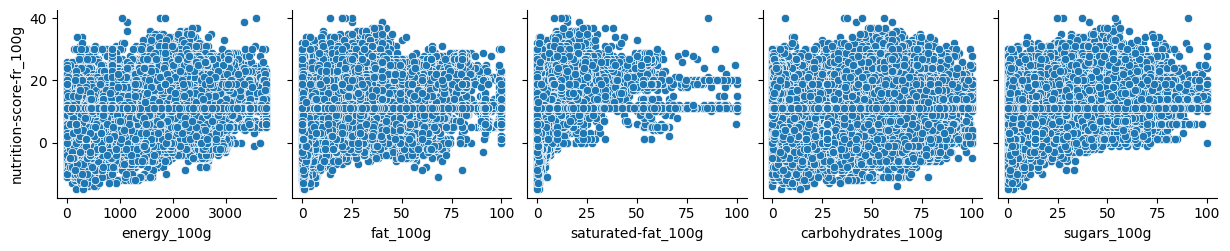

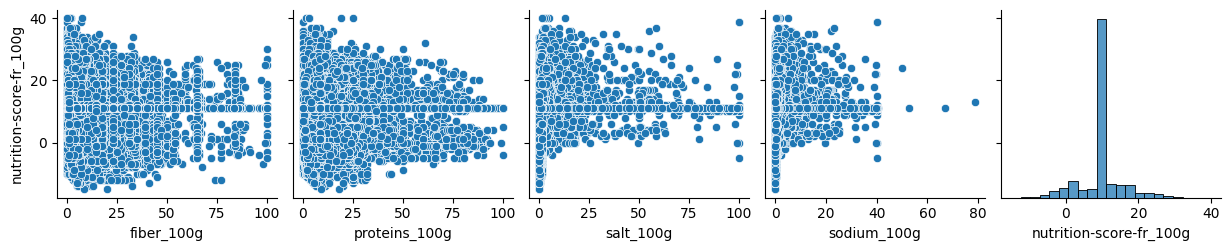

In [21]:
for i in range(0, len(data_exploration_num.columns), 5):
    sns.pairplot(data=data_exploration_num,
    x_vars = data_exploration_num.columns[i:i+5],
    y_vars = ['nutrition-score-fr_100g'])

**Feature numérique / Feature Catégorielle**

Analysons comment varient les nutritions grade en fonction de la qualité de gras contenus dans les produits

**Nutrition grade & saturated_fat_100g**

Analysons comment varient les nutrition grade en fonction de la qualité de gras contenus dans les produits

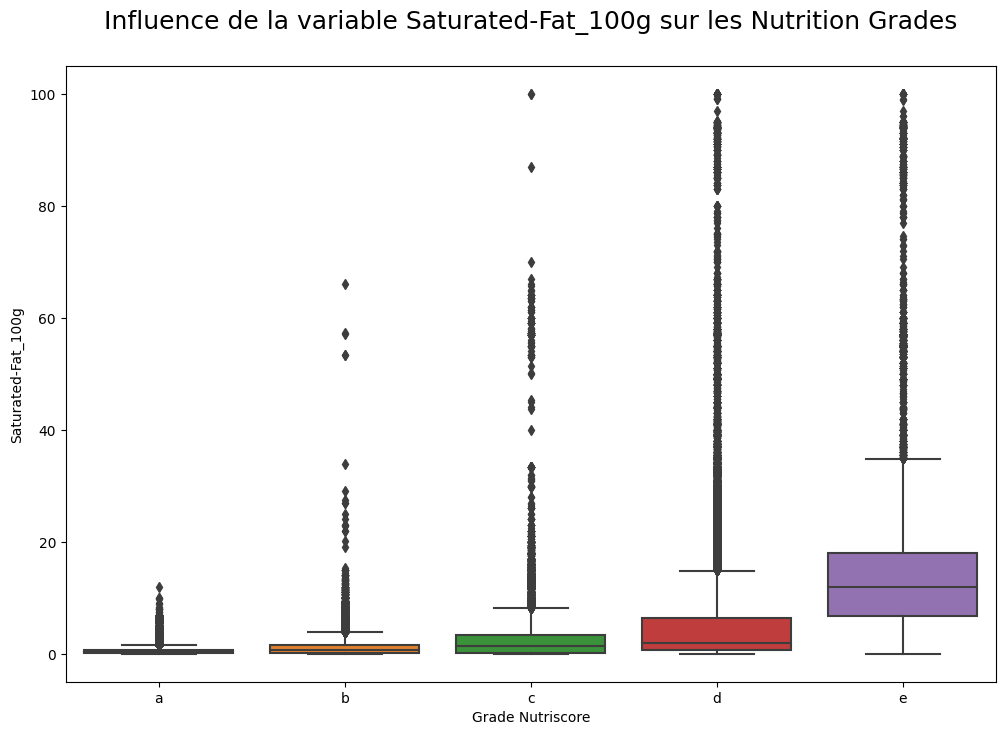

In [22]:
ordre_nutrition_grade = data_exploration.groupby('nutriscore_grade')['saturated-fat_100g'].median().sort_values().index
plt.figure(figsize=(12,8))
ax=sns.boxplot(x="nutriscore_grade", y="saturated-fat_100g", showfliers=True,order=ordre_nutrition_grade, 
            data=data_exploration)
ax.set_xlabel("Grade Nutriscore")
ax.set_ylabel("Saturated-Fat_100g")
title=plt.title("Influence de la variable Saturated-Fat_100g sur les Nutrition Grades" "\n", fontsize=18)


les produits ayant les plus mauvais grades sont ceux en moyenne qui ont plus de matières grasses

**Nutrition_grade & Energy_100g**

Analysons comment varient les nutrition grade en fonction de la valuer energétique des produits

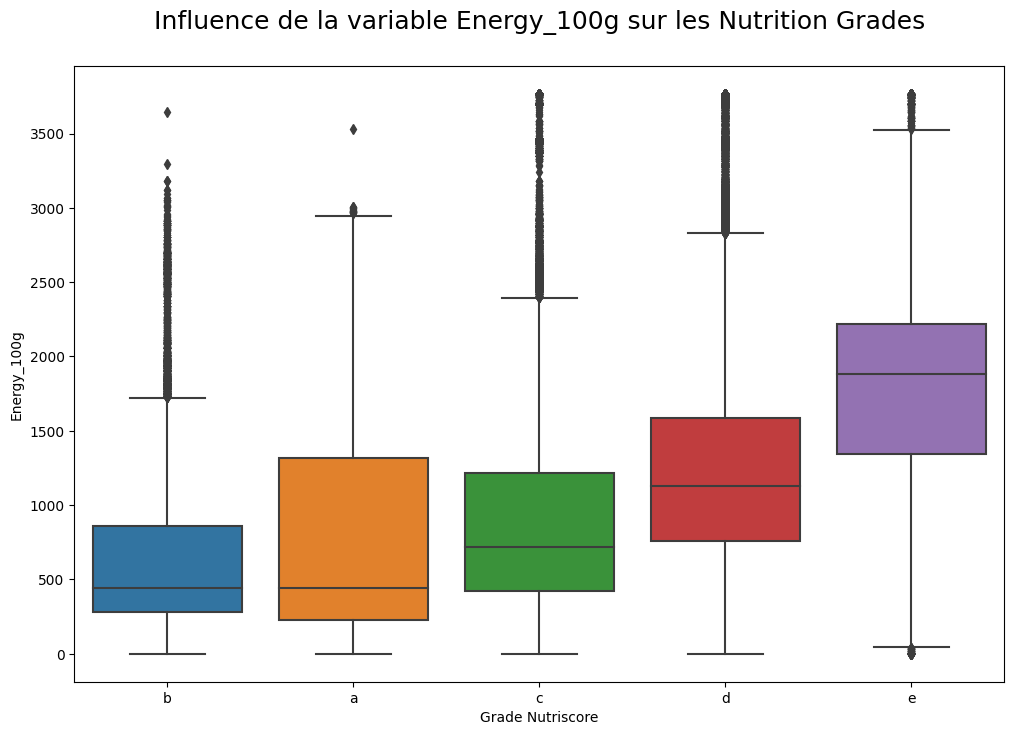

In [23]:
ordre_nutrition_grade_ = data_exploration.groupby('nutriscore_grade')['energy_100g'].median().sort_values().index
plt.figure(figsize=(12,8))
ax=sns.boxplot(x="nutriscore_grade", y="energy_100g", showfliers=True,order=ordre_nutrition_grade_, 
            data=data_exploration)
ax.set_xlabel("Grade Nutriscore")
ax.set_ylabel("Energy_100g")
title=plt.title("Influence de la variable Energy_100g sur les Nutrition Grades" "\n", fontsize=18)

**Nutrition_grade & Fat_100g**

Analysons comment varient les nutrition grade en fonction de la valuer energétique des produits

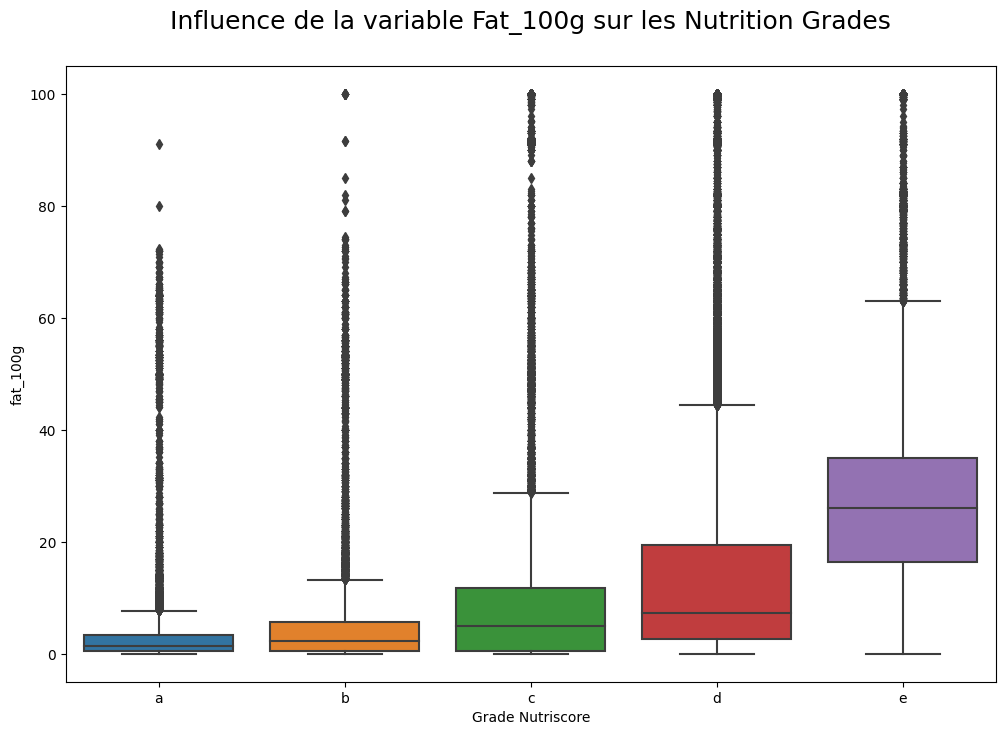

In [24]:
ordre_nutrition_grade_ = data_exploration.groupby('nutriscore_grade')['fat_100g'].median().sort_values().index
plt.figure(figsize=(12,8))
ax=sns.boxplot(x="nutriscore_grade", y="fat_100g", showfliers=True,order=ordre_nutrition_grade_, 
            data=data_exploration)
ax.set_xlabel("Grade Nutriscore")
ax.set_ylabel("fat_100g")
title=plt.title("Influence de la variable Fat_100g sur les Nutrition Grades" "\n", fontsize=18)

Les produits ayant les plus mauvais grades score sont ceux en moyenne ayant les plus grandes de valeurs energétiques

**Nutrition_score & pnns_groups_1**

Afin de faciliter l'analyse, discrétisons la variable nutrition-score en 4 sous-groupes de même tailles: 

In [25]:
data_exploration['classes_nutrition-score'] = pd.qcut(data_exploration['nutrition-score-fr_100g'], 2, duplicates='drop')

Analysons comment est distribué le nutriscore par catégorie de produits pnns_groups_1:


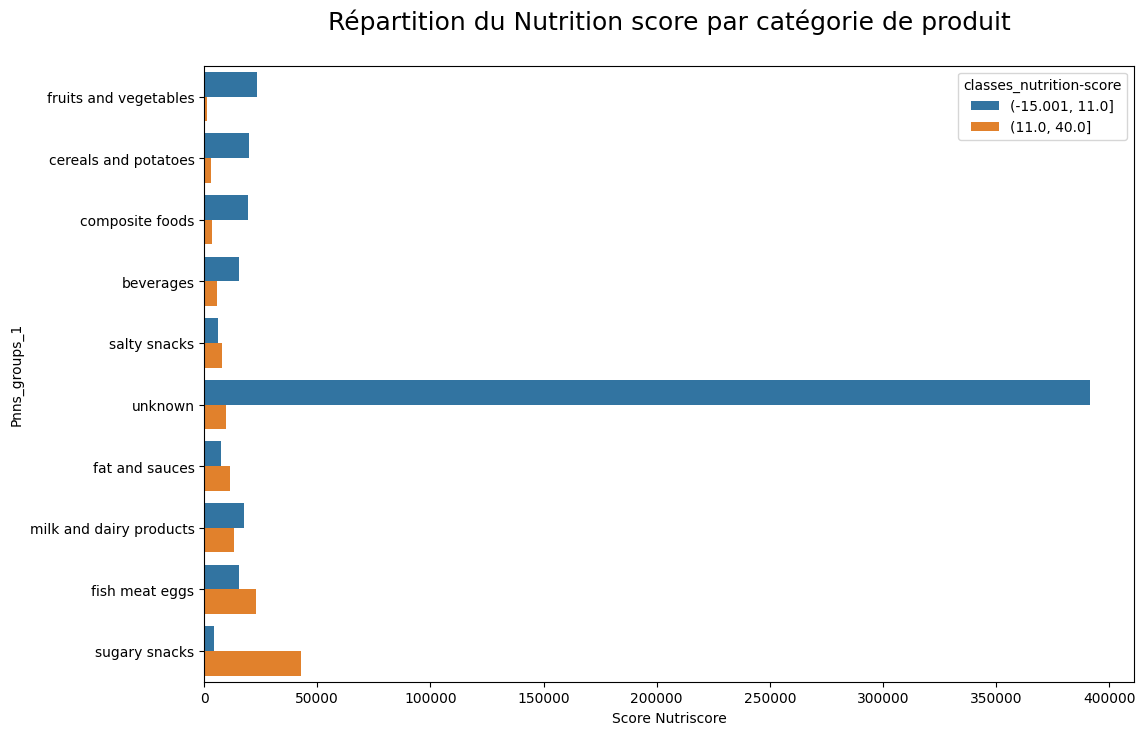

In [26]:
plt.figure(figsize=(12, 8))
filtre_meilleur_scores = data_exploration['classes_nutrition-score'] == data_exploration['classes_nutrition-score'].cat.categories[-1]
ordre_nutri_score = data_exploration[filtre_meilleur_scores].groupby('pnns_groups_1')['classes_nutrition-score'].count().sort_values().index
ax=sns.countplot(y="pnns_groups_1", hue="classes_nutrition-score", data=data_exploration, order=ordre_nutri_score )
ax_set=ax.set_xlabel("Score Nutriscore")
ax.set_ylabel("Pnns_groups_1")
title=plt.title("Répartition du Nutrition score par catégorie de produit" "\n", fontsize=18)

Les 'composite foods', 'cereals and potatoes', 'fruits and vegetables' ont une majorité de produits ayant les meilleurs grades car ayant des nutrition scores les plus faibles.En revanche les 'sugary snacks' est la catégorie ayant la proportion de produits ayant les plus mauvais grades la plus importante.
Les produits de la catégorie la plus représentée 'unknown' ont en majorité un nutrition score entre -15 et 11

**ANALYSE MULTIVARIEE**

**ACP**

Nous allons réaliser une analyse en composantes principales afin d'établir les liaisons eventuelles entre les variables 

Nous allons supprimé pour notre ananlyse les variables carbohydrates_100g et fat_100g corrélées respectivement à sufars_100g et saturated_100g

In [27]:
acp_vars = ['energy_100g', 'saturated-fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g','nutrition-score-fr_100g']
X = data_exploration[acp_vars]
keep_ind = X.index
X = StandardScaler().fit_transform(X) 

Affichons le diagramme d'éboulis des valeurs propres

In [28]:
#fonction permettant de déssiner les eboulis des valeurs propres
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("Rang de l'axe d'inertie ")
    plt.ylabel("Pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

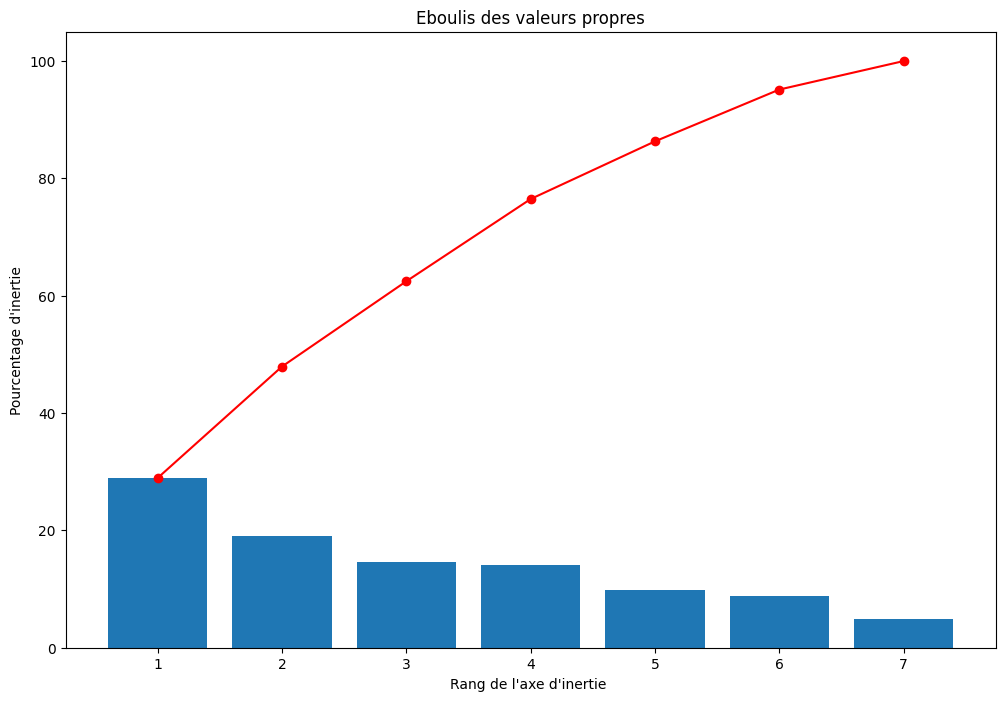

In [29]:
plt.figure(figsize=(12,8))
pca = decomposition.PCA(n_components=len(acp_vars))
pca.fit(X)
X = pca.transform(X)

display_scree_plot(pca)

In [30]:
varexpl = pca.explained_variance_ratio_*100
print("Le premier plan factoriel couvrira une inertie de {:.2f}% et le second plan : {:.2f}%.".format(varexpl[0:2].sum(),varexpl[0:4].sum()))

Le premier plan factoriel couvrira une inertie de 47.93% et le second plan : 76.48%.


Les 2 premiers plans factoriels couvrent une inertie d'un peu plus de 75%. Une analyse sur F1 et F2 semble donc cohérente.

Projetons à présent le cercle des corrélations:

In [31]:
#fonction permettant de déssiner le cercle des corrélations
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

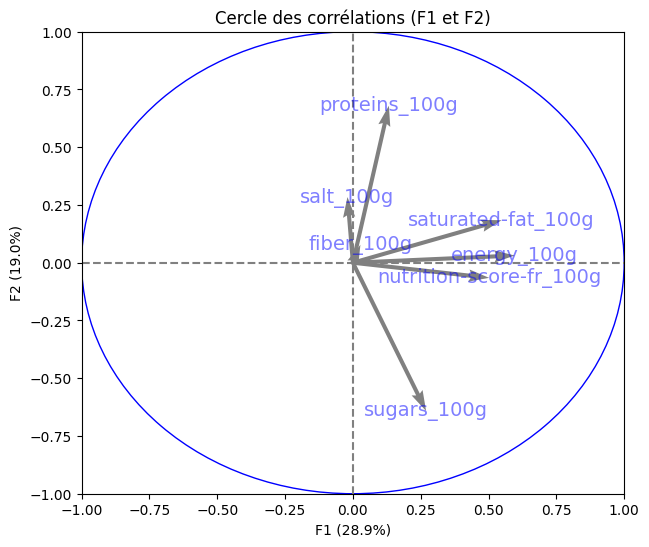

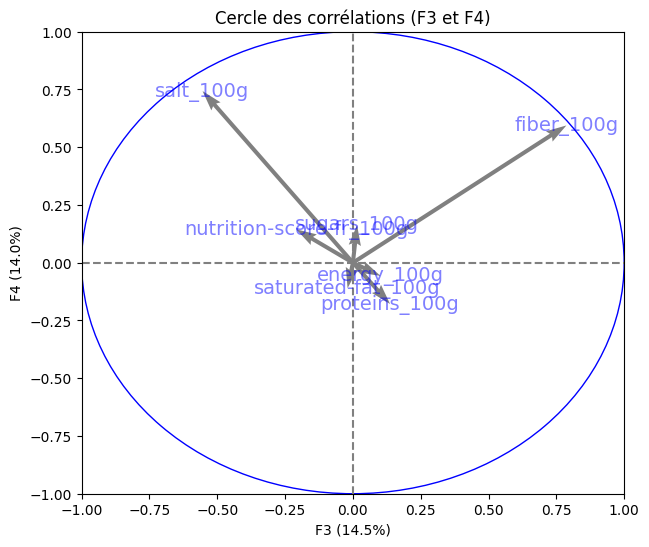

In [32]:
acp_df = pd.DataFrame(X)
pcs = pca.components_
display_circles(pcs, 4, pca, [(0,1), (2,3)], labels = np.array(acp_vars))

Analysons la composant du premier plan factoriel, les variables les plus corrélées à F1 et positivement sont : 

* nutrition-score-fr_100g
* energy_100g
* saturated-fat_100g

On pourrait donc remplacer ces variables par une variable F1 ou F1 est égal à : 

In [33]:
acp_df[0]

0         2.685650
1         0.135613
2         0.974703
3         2.485909
4        -2.122265
            ...   
641037   -1.507469
641038   -0.201763
641039   -0.190806
641040   -0.260874
641041    0.797421
Name: 0, Length: 641042, dtype: float64

Pour la seconde composante, on voit que les variables les plus corrélées à F2 sont : 

* Proteins_100g positivement
* Sugars_100g négativement

On pourrait aussi remplacer ces variables par une nouvelle variables F2 est égal à : 

In [34]:
acp_df[1]

0        -1.787847
1         0.380280
2        -1.685902
3        -0.662111
4        -0.035102
            ...   
641037   -0.510210
641038    1.010119
641039   -0.108593
641040   -1.449863
641041   -2.198656
Name: 1, Length: 641042, dtype: float64

Pour le second plan factoriel, les variables les plus corrélées à F3 positivement sont : 
* Salt_100g
* Fiber_100g

On pourrait aussi remplacer ces variables par une nouvelle variable F3 ou F3 est égal à :

In [35]:
acp_df[2]

0        -0.760824
1         0.007623
2        -0.159079
3         0.194905
4         0.270119
            ...   
641037   -0.452514
641038   -0.112606
641039   -0.329831
641040   -0.413411
641041   -0.230022
Name: 2, Length: 641042, dtype: float64

In [36]:
data_exploration.head()

,code,product_name,countries_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutriscore_grade,nutrition-score-fr_100g,pnns_groups_1,pnns_groups_2,classes_nutrition-score
0,3760029248001,Caramels tendres au beurre salé au sel de Guér...,France,1717.0,10.9,7.0,73.50000,49.300000,3.0,3.000000,1.700000,e,28.0,sugary snacks,sweets,"(11.0, 40.0]"
1,3029330062806,Jacquet Les bouchées créatives à garnir,France,1898.0,15.5,1.3,68.00000,2.000000,3.0,8.500000,1.752600,c,10.0,salty snacks,appetizers,"(-15.001, 11.0]"
2,3257980112590,Boudoirs,France,1615.0,3.2,1.2,80.40000,51.800000,1.6,6.900000,0.090000,d,14.0,sugary snacks,biscuits and cakes,"(11.0, 40.0]"
3,3160181210524,Cookies tout chocolat Biocoop,France,2040.0,25.0,14.0,56.00000,33.000000,5.5,7.000000,0.381000,e,19.0,sugary snacks,biscuits and cakes,"(11.0, 40.0]"
4,8002270014901,Eau minérale naturelle avec adjonction de gaz ...,"Belgique,France,Italie,Luxembourg,Suisse",179.0,0.0,0.0,27.23533,13.938277,3.3,8.739423,1.279682,a,0.0,beverages,waters and flavored waters,"(-15.001, 11.0]"


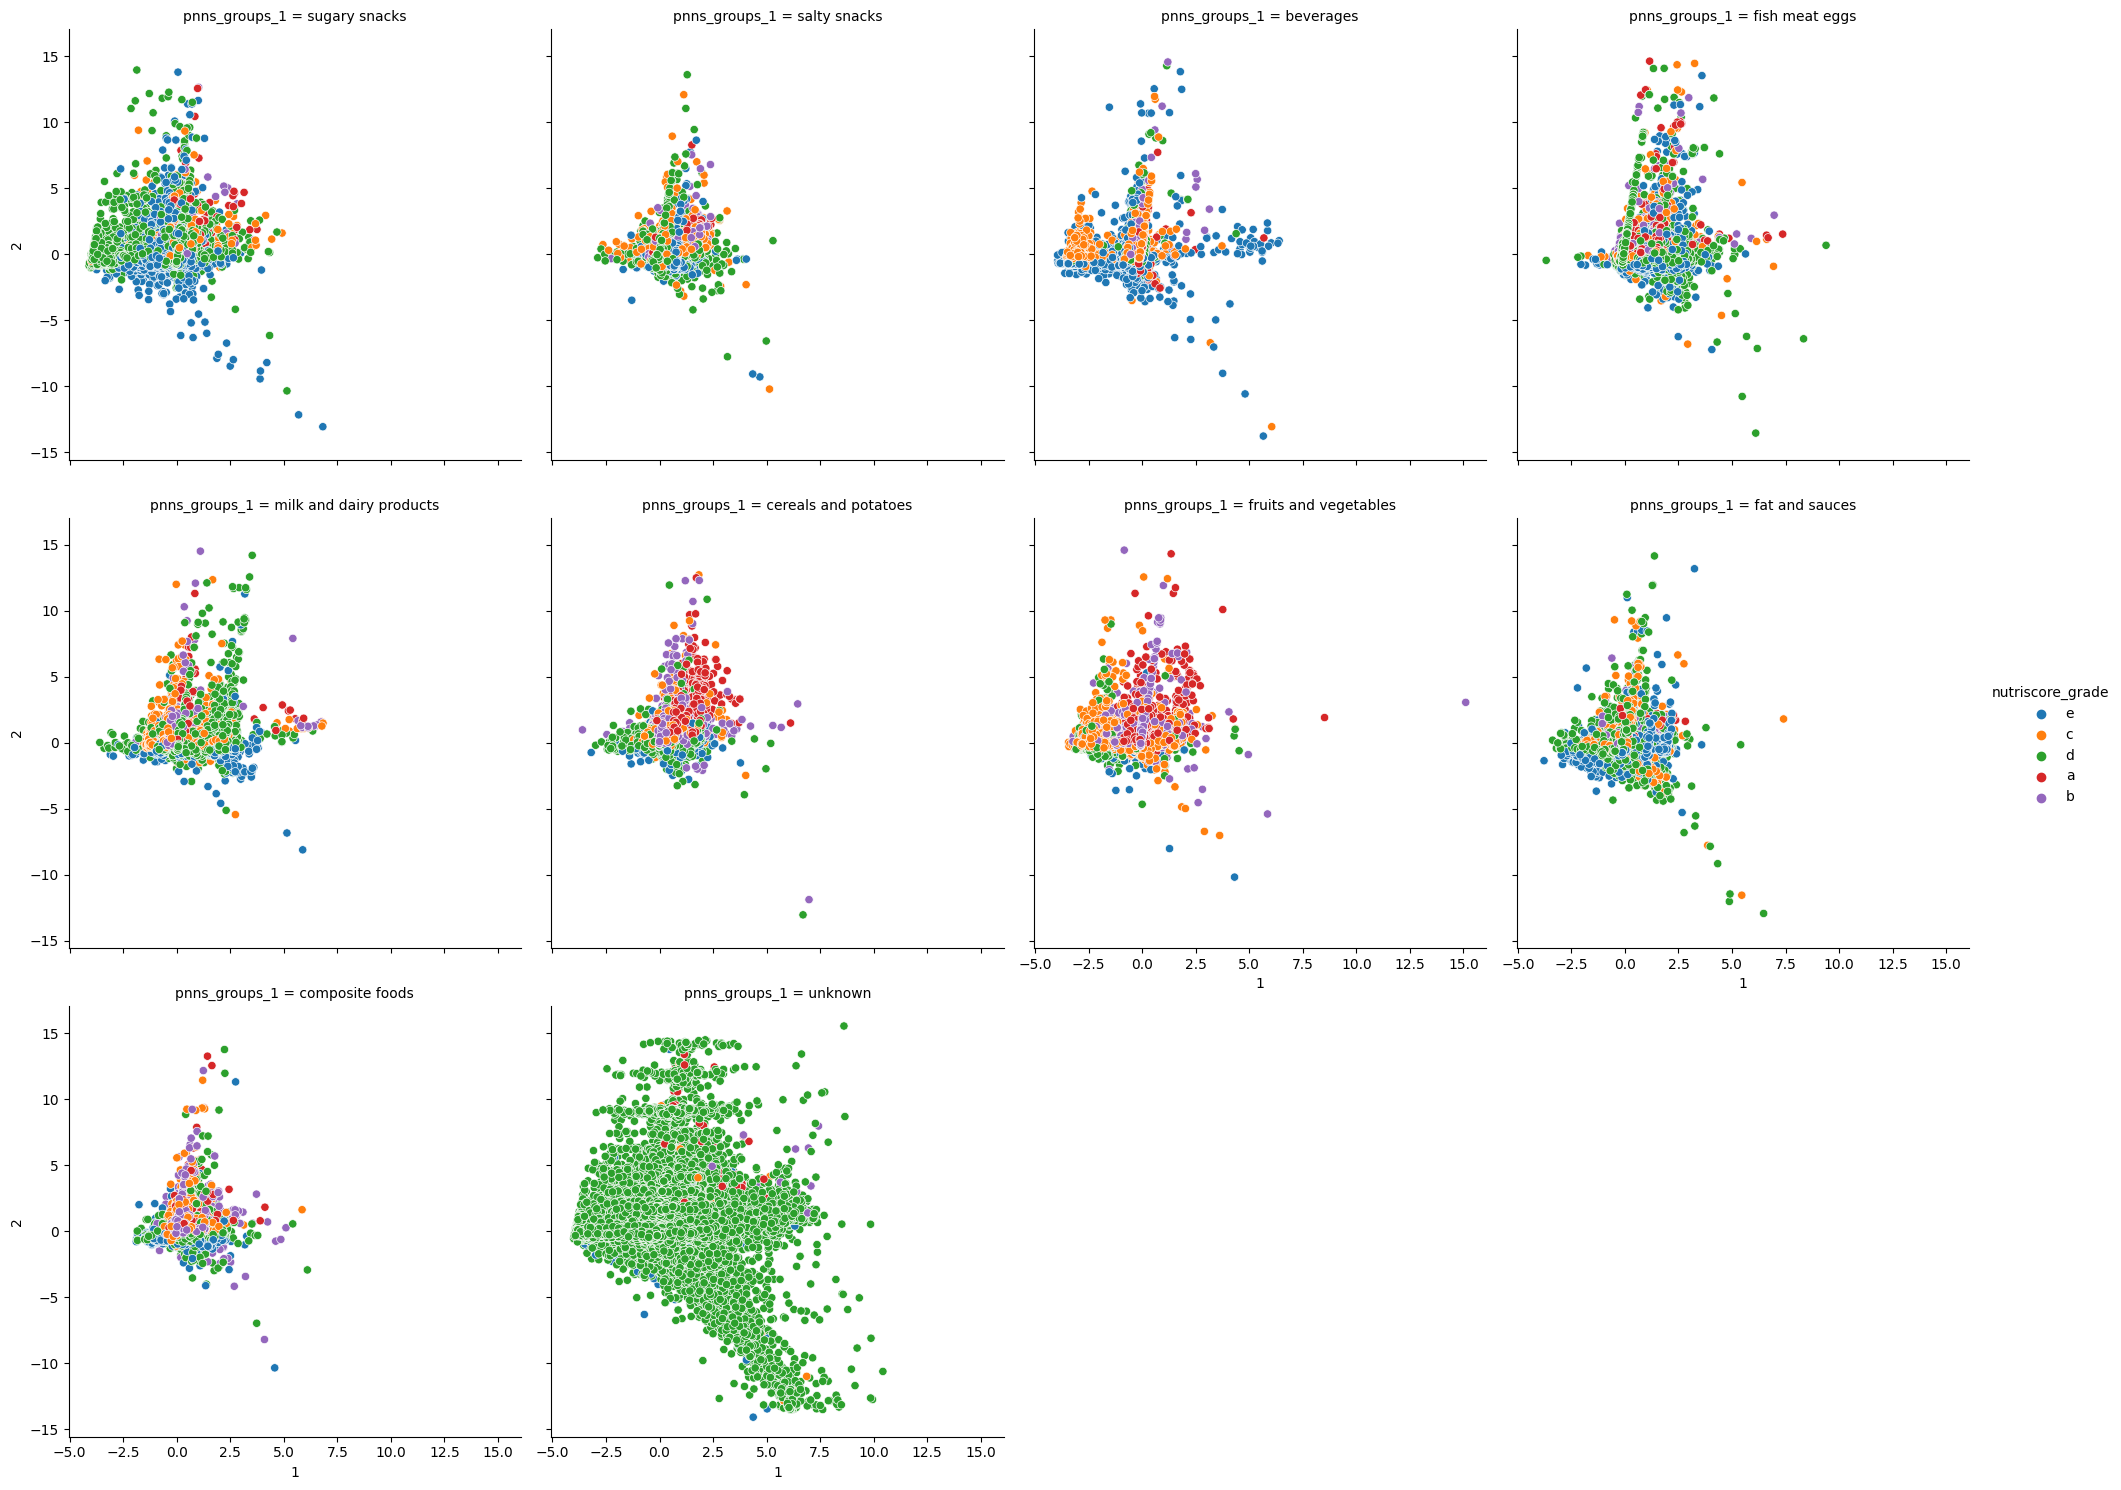

In [37]:
#Visualisons les individus sur le premier plan factoriel
acp_df['nutriscore_grade'] = data_exploration.loc[keep_ind, 'nutriscore_grade']
acp_df['pnns_groups_1'] = data_exploration.loc[keep_ind, 'pnns_groups_1']
ax = sns.relplot(data=acp_df, x=1, y=2, col='pnns_groups_1', col_wrap=4, hue='nutriscore_grade')

Comme F1 est très corrélée aux variables nutrition-score-fr_100g, energy_100g, saturated-fat_100g, alors il y a de grandes chances pour que ces individus aient aussi de grandes valeurs pour ces variables.Ainsi, se déplacer le long des abscisses dans le sens croissant, c’est un peu se déplacer vers les produits qui ont un nutrition score élevé c'est à dire ayant le grade E comme on peut le voir sur le grafique.

**ANOVA**

**Nutrition-score-fr_100g & Pnns_groups_1**

Afin de vérifier si la catégorie (pnns_groups_1) influence réellement le nutrition-score, nous allons réaliser une ANOVA.

Pour commencer, projetons les boxplots de la répartition des nutrition-scores par catégorie pnns_groups_1:

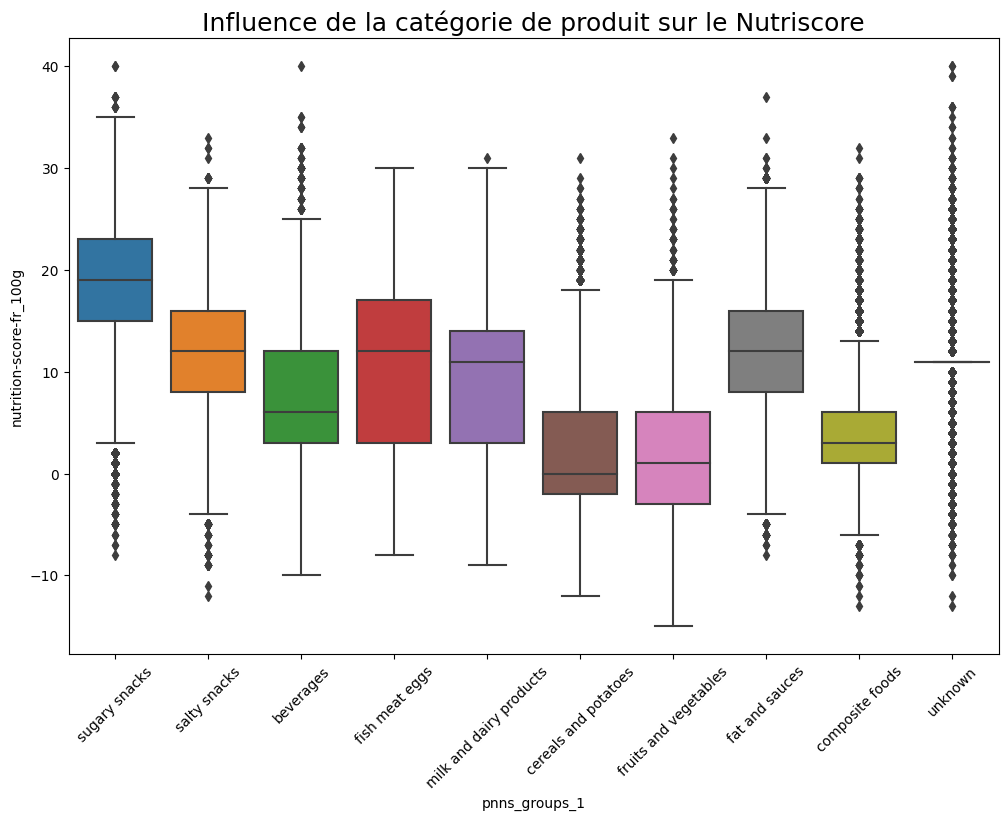

In [38]:
fig = plt.figure(figsize=(12,8))
ax = sns.boxplot(data=data_exploration, x='pnns_groups_1', y='nutrition-score-fr_100g')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title("Influence de la catégorie de produit sur le Nutriscore", fontsize=18)
plt.show()

On voit ici que les nutrition-score sont assez différents d'une catégorie à l'autre même si l'ordre de grandeur des écarts est relativement faible.Les distributions ne semblent pas suivre la loi normale. Mais vérifions cette affirmation par les chiffres, grâce à une modélisation:

In [39]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

In [40]:
#calculons l'éta squared
eta_squared(data_exploration['pnns_groups_1'], data_exploration['nutrition-score-fr_100g'])

0.4086560137644299

On obtient un résultat proche de 0.4, ce qui laisse penser qu'il y a effectivement une corrélation entre la catégorie et le nutrition-score.


**Test Statistique**

Nous allons réaliser un test statistique conforter le résultat précedent à savoir si la catégorie pnns_groups_1 influence réellement le nutrition-score.

Les hypothèses posées seront donc les suivantes :

* H0 : La distribution des échantillons est similaire (et donc la catégorie n'a aucune influence sur le Nutriscore).
* H1 : Une ou plusieurs distributions sont inégales.

Réalisons le test:

In [41]:
data_exploration=data_exploration.rename(columns={"nutrition-score-fr_100g":"nutrition_score_fr"})
anova_category = smf.ols('nutrition_score_fr ~ pnns_groups_1', data=data_exploration).fit()
print(anova_category.summary())

                            OLS Regression Results                            
Dep. Variable:     nutrition_score_fr   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                 4.922e+04
Date:                Wed, 15 Nov 2023   Prob (F-statistic):               0.00
Time:                        13:47:37   Log-Likelihood:            -1.8290e+06
No. Observations:              641042   AIC:                         3.658e+06
Df Residuals:                  641032   BIC:                         3.658e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [42]:
sm.stats.anova_lm(anova_category, typ=2)

,sum_sq,df,F,PR(>F)
pnns_groups_1,7.801570e+06,9.0,49221.50745,0.0
Residual,1.128923e+07,641032.0,NaN,NaN


Les résultats du test de Fisher nous indiquent ici une p-value de 0 pour l'ensemble des catégories, donc inferieur au niveau de test de 5%.
Nous rejettons donc l'hypothèse H0 selon laquelle les ditributions sont identiques.
La catégorie de produit a donc bien une influence sur le Nutrition-score.

**Idée d’application**

L’alimentation est une préoccupation majeure des personnes diabétiques car elle fait partie intégrante du traitement du diabète.
Les produits sucrés sont à limiter au maximum à cause de leur effet hyperglycémiant. Il faut absorber moins de sel car il augmente le risque d'hypertension artérielle et donc d'accident cardio-vasculaire, lequel est déjà majoré par le diabète.

L’alimentation doit être variée, équilibrée et régulière, les menus doivent être composés avec des aliments de chaque groupe, les légumes doivent figurer en priorité.

Notre idée d'application consitera à aider un diabetique résident en France à choisir des produits appropriés à son état de santé .Un diabete-score sera ainsi créer pour classer les produits en fonction de leur caractère bénéfique ou non pour le diabète.

Un diabete-grade sera aussi créer afin de noter les produits de A, pour les plus favorables sur le plan nutritionnel au diabète, à E, pour les moins favorables.

Notre jeu dispose d'assez de données nutritionnelles et catégorielles sur les produits,cela justifie la faisabilité de notre application.

Définissons une fonction qui attribue un score au produit relatif au caractère bénéfique ou non pour le diabète:

In [43]:
def calc_diabete_score(row):
    #Energy
    if row["energy_100g"] <= 335:
        a = 0
    elif ((row["energy_100g"] > 335) & (row["energy_100g"] <= 1675)):
        a = 5
    else:
        a = 10 
    #Sugar
    if row["sugars_100g"] <= 4.5:
        b = -5
    elif ((row["sugars_100g"] > 4.5) & (row["sugars_100g"] <= 22.5)):
        b = 1
    else:
        b = 10
    #Saturated-fat
    if row["saturated-fat_100g"] <= 1:
        c = -1
    elif ((row["saturated-fat_100g"] > 1) & (row["saturated-fat_100g"] <= 5)):
        c = 5
    else:
        c = 10
    #Salt
    if (row["salt_100g"]/1000) <= 90:
        d = -5
    elif (((row["salt_100g"]/1000) > 90) & ((row["salt_100g"]/1000) <= 450)):
        d = 5
    else:
        d = 10
    #Fruits-vegetables-rate
    if row["fruits-vegetables-rate_100g"] <= 40:
        e = 0
    elif ((row["fruits-vegetables-rate_100g"] > 40) & (row["fruits-vegetables-rate_100g"] <= 80)):
        e = -2
    else:
        e = -5
    #Fiber
    if row["fiber_100g"] <= 0.7:
        f = 0
    elif ((row["fiber_100g"] > 0.7) & (row["fiber_100g"] <= 3.5)):
        f = -2
    else:
        f = -5
    #Proteins
    if row["proteins_100g"] <= 1.6:
        g = 0
    elif ((row["proteins_100g"] > 1.6) & (row["proteins_100g"] <= 8)):
        g = -2
    else:
        g = -5
    
    #Global_score
    global_score = a+b+c+d+e+f+g
    
    return global_score

La variable fruits-vegetables-rate_100g indiquant la proportion de fruit/légumes des produits ayant été supprimée car très peu renseignée. Nous allons l'estimer en fonction des catégories représentées dans pnns_groups_2 :

In [44]:
high_rate_fruit = ['fruit juices','dried fruits','legumes','vegetables','fruits', 'soups','potatoes','fruit nectars']

medium_rate_fruit = ['unknown', 'sweetened beverages', 'dressings and sauces', 'ice cream', 'pastries', 'dairy desserts',
                     'pizza pies and quiche', 'pizza pies and quiches']

low_rate_fruit = ['waters and flavored waters','chocolate products', 'fish and seafood', 'salty and fatty products', 
                  'cheese', 'cereals', 'appetizers', 'one dish meals', 'bread', 'fats', 'plant based milk substitutes',
                  'alcoholic beverages', 'processed meat', 'breakfast cereals', 'meat', 'eggs', 'sandwiches',
                  'offals', 'teas and herbal teas and coffees', 'biscuits and cakes', 'sweets', 'milk and yogurt',
                  'artificially sweetened beverages', 'unsweetened beverages','nuts']

Créons la feature indiquant la proportion de fruit/légumes des produits:



In [45]:
data_exploration['fruits-vegetables-rate_100g'] = [81 if cat in high_rate_fruit else 45 if cat in medium_rate_fruit else 25 for cat in data_exploration.pnns_groups_2]

In [46]:
#définissons une fonction qui associe les grades corresondants aux scores obtenus 
def calc_diabete_grade(row):
    if row["diabete_score"] < 0 :
        diabetescore = "a"
    elif ((row["diabete_score"] >= 0) & (row["diabete_score"] < 5)) :
        diabetescore = "b"
    elif ((row["diabete_score"] >= 5) & (row["diabete_score"] < 10)) :
        diabetescore = "c"
    elif ((row["diabete_score"] >= 10) & (row["diabete_score"] < 20)) :
        diabetescore = "d"
    else:
        diabetescore = "e"
        
    return diabetescore

In [47]:
#créons les features diabete_score et diabete_grade pour classifier les produits 
data_exploration['diabete_score'] = data_exploration.apply(lambda row: calc_diabete_score(row),axis=1)
data_exploration['diabete_grade'] = data_exploration.apply(lambda row: calc_diabete_grade(row),axis=1)

In [48]:
#Visualissons par exemple le diabète score et grade des produits ayant une quantité de sucre élevée.
data_sugary = data_exploration[data_exploration['pnns_groups_1'] == 'sugary snacks']
data_sugary[['product_name', 'countries_fr', 'diabete_score', 'diabete_grade']]

,product_name,countries_fr,diabete_score,diabete_grade
0,Caramels tendres au beurre salé au sel de Guér...,France,21,e
2,Boudoirs,France,11,d
3,Cookies tout chocolat Biocoop,France,18,d
5,Milka Noisette Entières,"France,Allemagne,Suisse",18,d
12,Rond Noir,France,11,d
...,...,...,...,...
640445,unknown,France,7,c
640639,Pains au lait à la farine complète,France,-6,a
640746,Amandes Caramélisées,France,10,d
640750,PALMIERS,France,9,c
